<b>Jacob J. Zhang</b><br>
<i>CISC 5420 Final Project</i><br>
Why Do Higher Populated Regions Provide a Higher Well-Being Index?

The question I had posed for the midterm project was whether or not regions with lower populations had a higher well-being index, as defined by 1) access to education, 2) access to healthcare, and 3) income. For that project, I analyzed the different components separately, finding out that each benefitted from more residents, before coming up a composite metric that enabled us to see the big picture. We ended up seeing trends where densely populated regions seemed to provide 1) less students per school, 2) slightly more "access" to healthcare, and 3) greater incomes-- all things which contributed to having a stronger composite index score for our well-being metric.

With this finding, I then began to ponder why this was the case. As populations grow, one would expect the number of health establishments (our metric for healthcare access) and educational establishments (metric for educational access) to continue to be proportional to the overal population. However, our analysis seemed to indicate that they actually scaled faster than population-- meaning as population grew, the number of these socially-positive instituions grew faster. This created an environment where there is a low resident-to-establishment ratio, a very good thing enabling more individualized personal care medically, and smaller classes in schools (theoretically). Here is a table with our findings thus far:

In [252]:
%matplotlib inline
import numpy
import pandas
import scipy
from scipy import stats
from scipy.stats.mstats import gmean

# Importing and formatting population data
pop_index = pandas.read_csv('datasets/population_values.csv', sep=',', index_col=False, encoding='latin-1', skiprows=1, skipfooter=4, engine='python').set_index('Geographic region', drop=False)
latest_pop = pop_index[pop_index['Geographic region'] != 'United States']['Population Estimate (as of July 1) - 2015']

# Importing and formatting educational establishment data
edu_by_geo = pandas.read_csv('datasets/educational_est_values.csv', sep=',', encoding='latin-1', skiprows=1).set_index('Geographic area name', drop=False)
all_edu_est = edu_by_geo[edu_by_geo['Meaning of Type of operation or tax status code'] == 'All establishments']

# Importing and formatting health establishment data
health_est = pandas.read_csv('datasets/health_est_values.csv', sep=',', encoding='latin-1', skiprows=1).set_index('Geographic area name', drop=False)
health_est_all = health_est[health_est['Meaning of Type of operation or tax status code'] == 'All establishments']

# Concatenating health and educational data
flattened_all_health_est = health_est_all.groupby('Geographic area name').sum().sort_values(by='Number of establishments', ascending=False)
flattened_all_edu_est = all_edu_est.groupby('Geographic area name').sum().sort_values(by='Number of establishments', ascending=False)
health_edu_est = pandas.concat([flattened_all_health_est['Number of establishments'], flattened_all_edu_est['Number of establishments']], axis=1)
health_edu_est.columns = ['Health Establishments', 'Educational Establishments']

# Importing and formatting economic data
business = pandas.read_csv('datasets/business_est_values.csv', sep=',', encoding='latin-1', skiprows=13, skipfooter=24, engine='python') 
business_totals = business[business['Meaning of 2012 NAICS code'] == 'Total for all sectors']
business_grouped = business_totals[['Geographic area name', 'Payroll Per Employee']].groupby('Geographic area name').sum()
pandas.concat([health_edu_est, business_grouped['Payroll Per Employee'], latest_pop], axis=1).sort_values(by='Payroll Per Employee')
full_table = pandas.concat([health_edu_est, business_grouped['Payroll Per Employee']], axis=1).sort_values(by='Payroll Per Employee').dropna()
edu_table = pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1)
full_table['Residents per Edu. Est.'] = edu_table['Population Estimate (as of July 1) - 2015'] / edu_table['Number of establishments']
health_table = pandas.concat([flattened_all_health_est['Number of establishments'], latest_pop], axis=1)
full_table['Residents per Health Est.'] = health_table['Population Estimate (as of July 1) - 2015'] / health_table['Number of establishments']

# Calculating the HDI via stats.rankdata
full_table['Residents Per Edu Percentile'] = 1 - stats.rankdata(full_table['Residents per Edu. Est.'], "average")/len(full_table['Residents per Edu. Est.'])
full_table['Residents Per Health Percentile'] = 1 - stats.rankdata(full_table['Residents per Health Est.'], "average")/len(full_table['Residents per Health Est.'])
full_table['Payroll Percentile'] = (stats.rankdata(full_table['Payroll Per Employee'], "average")/len(full_table['Payroll Per Employee']))
res = full_table['Residents Per Edu Percentile'] * full_table['Residents Per Health Percentile'] * full_table['Payroll Percentile'] 
full_table['HDI Percentile'] = res**(1. / 3.)
final = full_table[['Residents Per Edu Percentile', 'Residents Per Health Percentile', 'Payroll Percentile', 'HDI Percentile']]
final.sort_values(by='HDI Percentile')

,Residents Per Edu Percentile,Residents Per Health Percentile,Payroll Percentile,HDI Percentile
Geographic area name,,,,
"Pueblo-CaÐon City, CO CSA",0.000000,0.000000,0.231928,0.000000
"Moses Lake-Othello, WA CSA",0.006024,0.006024,0.518072,0.026590
"DeRidder-Fort Polk South, LA CSA",0.114458,0.012048,0.072289,0.046367
"Clovis-Portales, NM CSA",0.030120,0.192771,0.018072,0.047167
"Visalia-Porterville-Hanford, CA CSA",0.042169,0.018072,0.153614,0.048919
"Brownsville-Harlingen-Raymondville, TX CSA",0.054217,0.331325,0.009036,0.054549
"McAllen-Edinburg, TX CSA",0.066265,0.409639,0.009036,0.062597
"El Paso-Las Cruces, TX-NM CSA",0.198795,0.036145,0.045181,0.068728
"Dixon-Sterling, IL CSA",0.018072,0.060241,0.307229,0.069415


My methodolody for analysis would be simple and similar to the midterm-- I'd look at each individual aspect of our composite Human Development Index metric, and focus on how more residents may positively impact that component. I started by looking at healthcare access. The initial question was why healthcare access seemed to scale with population. Naturally, the first thing that came to mind was to look at the demographics of those with health insurance. In the U.S. system, access to healthcare and health insurance are nearly synonymous.

The characteristic that jumped out initially in the dataset was that of age.

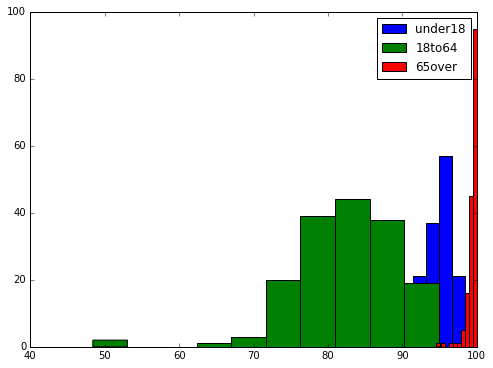

In [253]:
insurance = pandas.read_csv('datasets/insured_values.csv', sep=',', encoding='latin-1', skiprows=1, engine='python', index_col='Geography')
insurance.rename(columns={
    'Percent Insured; Estimate; AGE - Under 18 years' : 'under18',
    'Percent Insured; Estimate; AGE - 18 to 64 years' : '18to64',
    'Percent Insured; Estimate; AGE - 65 years and older' : '65over',
    'Total; Estimate; Civilian noninstitutionalized population' : 'population'
}, inplace=True)

ageGroups = ['under18', '18to64', '65over']

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for ageGroup in ageGroups:
    plt.hist(insurance[ageGroup], label=ageGroup)
plt.legend()

In terms of age, the deepest concentration seem to the older, above 65 population. Relating this back to population, the greater the population, the more senior citizens there would be. If senior citizens consistently had the highest rates of healthcare access, it would have a tremendous effect size on the HDI. I became curious how the population of senior citizens scaled as population grew-- could it be possible that the effect size was even larger than anticipated? This would be true if higher population regions not only have more senior citizens due to simply having more people, but also having a higher percentage of senior citizens as well:

under18pop , Slope:  0.233095989395 , Intercept:  4827.60409385
18to64pop , Slope:  0.638634979807 , Intercept:  -12462.2191982
65overpop , Slope:  0.128269030798 , Intercept:  7634.61510432


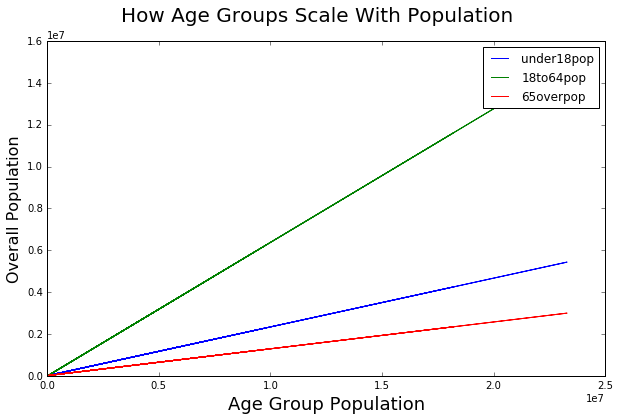

In [254]:
insurance.rename(columns={
        'Total; Estimate; AGE - Under 18 years' : 'under18pop',
        'Total; Estimate; AGE - 18 to 64 years' : '18to64pop',
        'Total; Estimate; AGE - 65 years and older' : '65overpop',
        'Total; Estimate; Civilian noninstitutionalized population' : 'population'
    }, inplace=True)

ageGroups = ['under18pop', '18to64pop', '65overpop']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for line in ageGroups:
    m, b = numpy.polyfit(insurance['population'], insurance[line], 1)
    print(line, ', Slope: ', m, ', Intercept: ', b)
    plt.plot(insurance['population'], m*insurance['population'] + b, '-', label=line)
plt.legend()
plt.suptitle('How Age Groups Scale With Population', fontsize=20)
plt.xlabel('Age Group Population', fontsize=18)
plt.ylabel('Overall Population', fontsize=16)

The slope of the linear model for the 65 and older group of residents is less than the other two groups. We can interpret this as meaning it does not grow nearly as fast relatively, and thus does not have as large an impact on our well-being index as we hypothesized.

This leads us to looking at another aspect of the insured demographic-- income, which is coincidentally another factor in our composite well-being index. As the below shows, there seems to a direct correlation when looking at the distribution of insured residents throughout the country as income grows:

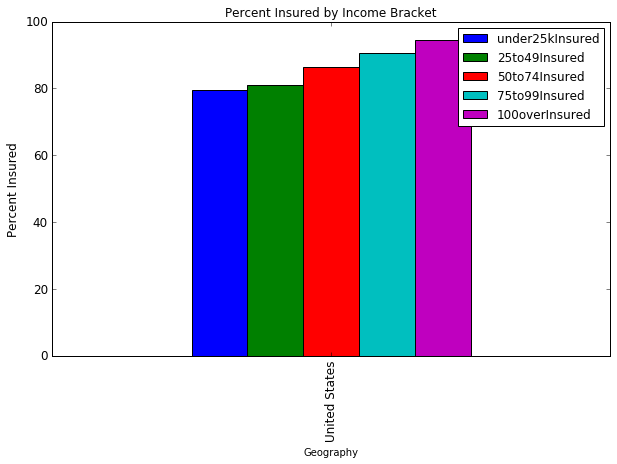

In [277]:
us_insurance = pandas.read_csv('datasets/us_insurance.csv', sep=',', encoding='latin-1', skiprows=1, engine='python', index_col='Geography')
us_insurance.rename(columns={
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - Under $25,000':'under25kInsured',
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - $25,000 to $49,999':'25to49Insured',
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - $50,000 to $74,999':'50to74Insured',
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - $75,000 to $99,999':'75to99Insured',
        'Percent Insured; Estimate; HOUSEHOLD INCOME (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total household population - $100,000 and over':'100overInsured'
    }, inplace=True)
us_insurance_income = us_insurance[['under25kInsured', '25to49Insured', '50to74Insured', '75to99Insured', '100overInsured']]
ax = us_insurance_income.plot(kind='bar', title ="Percent Insured by Income Bracket", figsize=(10, 6), legend=True, fontsize=12)
ax.set_ylabel("Percent Insured", fontsize=12)

Thus, if we want to get a deeper understanding of why healthcare access, we inevitably need to look at net income. I began to focus on why high population densities tend to allow for greater economic opportunity (in terms of greater wages), with the question being "why would it not be proportional"? In other words, what causes people to earn more in more densely populated areas when they're doing the same jobs as people in less populated regions? Cost of living is obviously a factor, but what drives that up?

The next obvious variable to analyze is that of labor and occupation. Due to the United States' current policies on health insurance, most healthcare access is employer-based anyway. Analyzing occupation distribution at different population levels seemed to be the logical next step.

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     25.63
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           5.24e-18
Time:                        00:31:56   Log-Likelihood:                -1388.9
No. Observations:                 138   AIC:                             2790.
Df Residuals:                     132   BIC:                             2807.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       4.869e+04    611.940     79.

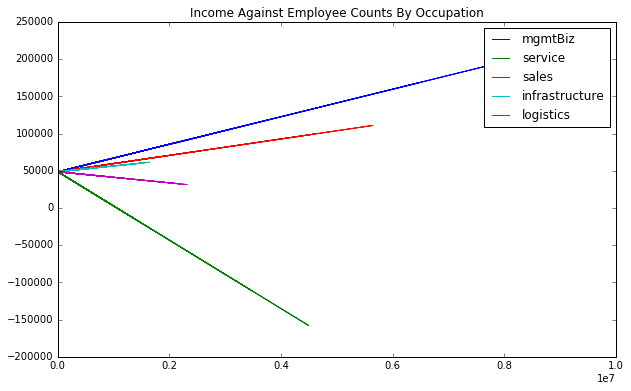

In [278]:
import statsmodels.formula.api as sm
demographics = pandas.read_csv('datasets/demographic_info.csv', sep=',', encoding='latin-1', skiprows=1, engine='python', index_col='Geography')
demographics.rename(columns={'Total; Estimate; OCCUPATION - Management, business, science, and arts occupations':'mgmtBiz',
 'Total; Estimate; OCCUPATION - Service occupations':'service', 
 'Total; Estimate; OCCUPATION - Sales and office occupations':'sales', 
 'Total; Estimate; OCCUPATION - Natural resources, construction, and maintenance occupations':'infrastructure', 
 'Total; Estimate; OCCUPATION - Production, transportation, and material moving occupations':'logistics',
 'Total; Estimate; Total population':'population'}, inplace=True)

occupations = demographics[['mgmtBiz', 'service', 'sales', 'infrastructure', 'logistics']];

# multiplying percentage by population to get totals
for idx, occupation in enumerate(['mgmtBiz', 'service', 'sales', 'infrastructure', 'logistics']):
    occupations[occupation] = occupations[occupation]/100 * demographics['population'] 
    
occupations['Income'] = demographics['Total; Estimate; Median Household income (dollars)']
result = sm.ols(formula="Income ~ mgmtBiz + service + sales + infrastructure + logistics", data=occupations).fit()

print(result.summary())

plt.figure(figsize=(10, 6))
for idx, occupationPop in enumerate(['mgmtBiz', 'service', 'sales', 'infrastructure', 'logistics']):
    x = occupations[occupationPop]
    # y = occupations['Income']
    y = float(result.params[0]) + float(result.params[idx + 1]) * x
    m, b = numpy.polyfit(x, y, 1)
    plt.plot(x, y, '-', label=occupationPop)

plt.title("Income Against Employee Counts By Occupation")
plt.legend()
plt.show()

Unsurprisingly, it appears that management and business jobs have a larger coefficient, and contribute a bit more to net income as population grows than other roles. With every unit of increase in population for each of these occupations, there is an increase in net income per household. This makes sense-- these jobs benefit from having more people to conduct business with, sell to, and cater to. However, we see that there is a decrease in net income as infrastructure and service employees grow. This may be due to these jobs leaning more on technology as the projects they work on become larger.

We can also look at how these occupations scale with population growth:

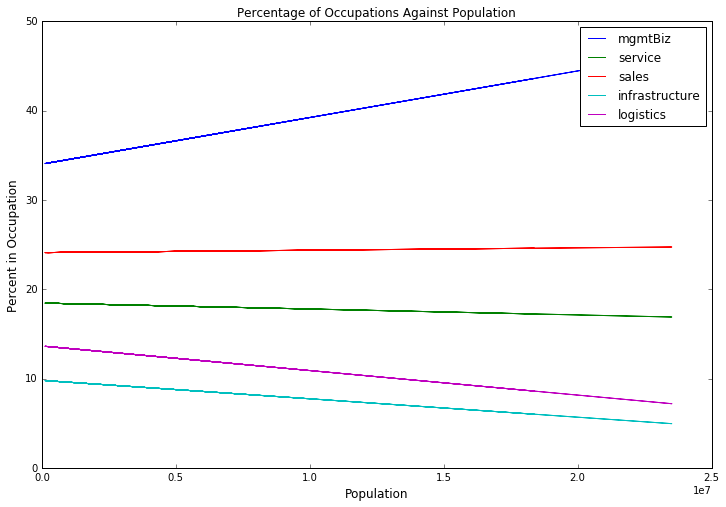

In [257]:
occupation_cats = demographics[['mgmtBiz', 'service', 'sales', 'infrastructure', 'logistics']];
plt.figure(figsize=(12, 8))
for occ in occupation_cats:
    x = demographics['population']
    y = occupation_cats[occ]
    m, b = numpy.polyfit(x, y, 1)
    plt.plot(x, m*x + b, '-', label=occ)
    
plt.title("Percentage of Occupations Against Population")
plt.ylabel("Percent in Occupation", fontsize=12)    
plt.xlabel("Population", fontsize=12)    
plt.legend()

Management and business roles also tend to scale with population as well, one interpretation being that high-population regions tend to offer more of these higher paying roles. Interestingly enough, there was a decrease in the percentage of logistics and infrastructure jobs as population grow. This would mean that the total number of workers in both fields stays relatively stable, and could indicate that there is a cap on logistics and infrastructure workers for regions, enabling or allowing the excess population to go into management and business positions. Of course, this makes the assumption that people don't try to go to higher-paying roles first, before looking at these other roles.

In addition to occupation, let's also analyze industries in the same way. We know that management and business roles correlate most with the average net worth in a region, and that there are more of them as population grows. However, in looking at types of work, one can't neglect the industry that the demographic is in. The results are, for the most part, consistent with our findings thus far:

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     12.37
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           2.88e-16
Time:                        00:23:03   Log-Likelihood:                -1381.7
No. Observations:                 138   AIC:                             2789.
Df Residuals:                     125   BIC:                             2827.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       4.953e+04    862.978     57.

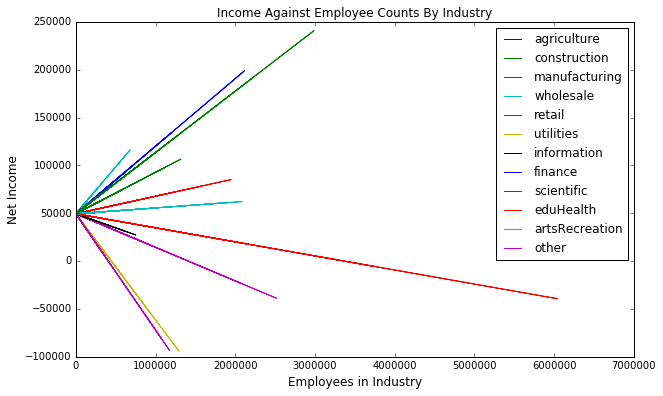

In [258]:
demographics.rename(columns={'Total; Estimate; INDUSTRY - Agriculture, forestry, fishing and hunting, and mining':'agriculture',
                             'Total; Estimate; INDUSTRY - Construction':'construction',
                             'Total; Estimate; INDUSTRY - Manufacturing':'manufacturing',
                             'Total; Estimate; INDUSTRY - Wholesale trade':'wholesale',
                             'Total; Estimate; INDUSTRY - Retail trade':'retail',
                             'Total; Estimate; INDUSTRY - Transportation and warehousing, and utilities':'utilities',
                             'Total; Estimate; INDUSTRY - Information':'information',
                             'Total; Estimate; INDUSTRY - Finance and insurance, and real estate and rental and leasing':'finance',
                             'Total; Estimate; INDUSTRY - Professional, scientific, and management, and administrative and waste management services':'scientific',
                             'Total; Estimate; INDUSTRY - Educational services, and health care and social assistance':'eduHealth',
                             'Total; Estimate; INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services':'artsRecreation',
                             'Total; Estimate; INDUSTRY - Other services (except public administration)':'other'}, inplace=True)

industries = demographics[['agriculture', 'construction', 'manufacturing', 'wholesale', 'retail', 'utilities', 'information', 'finance', 'scientific', 'eduHealth', 'artsRecreation', 'other']];

# multiplying percentage by population to get totals
for idx, industry in enumerate(['agriculture', 'construction', 'manufacturing', 'wholesale', 'retail', 'utilities', 'information', 'finance', 'scientific', 'eduHealth', 'artsRecreation', 'other']):
    industries[industry] = industries[industry]/100 * demographics['population'] 
    
industries['Income'] = demographics['Total; Estimate; Median Household income (dollars)']
result = sm.ols(formula="Income ~ agriculture + construction + manufacturing + wholesale + retail + utilities + information + finance + scientific + eduHealth + artsRecreation + other", data=industries).fit()

print(result.summary())

plt.figure(figsize=(10, 6))
for idx, industryPop in enumerate(['agriculture', 'construction', 'manufacturing', 'wholesale', 'retail', 'utilities', 'information', 'finance', 'scientific', 'eduHealth', 'artsRecreation', 'other']):
    x = industries[industryPop]
    # y = industries['Income']
    y = float(result.params[0]) + float(result.params[idx + 1]) * x
    plt.plot(x, y, '-', label=industryPop)

plt.title("Income Against Employee Counts By Industry")
plt.ylabel("Net Income", fontsize=12)    
plt.xlabel("Employees in Industry", fontsize=12)
plt.legend()
plt.show()


The wholesale trade, finance, scientific/technical industries have the highest coefficients in this linear regression model. This is unsurprising-- these are some of the most lucrative industries due to the scale of their business models. Let's see if, and how, the industries similarly stack up and scale with population.

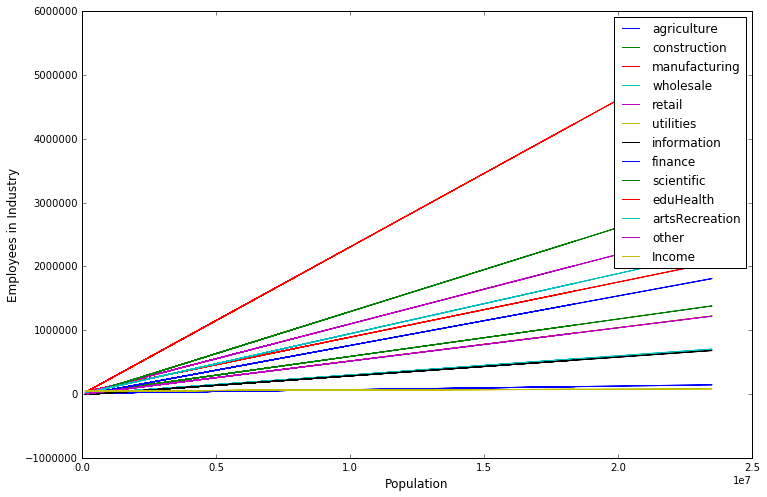

In [259]:
plt.figure(figsize=(12, 8))
for ind in industries:    
    x = demographics['population']
    y = industries[ind]
    m, b = numpy.polyfit(x, y, 1)
    plt.plot(x, m*x + b, '-', label=ind)

plt.ylabel("Employees in Industry", fontsize=12)    
plt.xlabel("Population", fontsize=12)
plt.legend()

As far as how these industries scale with population, it appears more residents means many more employees who go into education and health, retail trade, and scientific/technical pursuits. For the most part, this is intuitive-- more residents means more people to teach, whose health needs to be cared for. Additionally, retail trade would also scale well because it means more people are buying things. The rate at which scientific and technical employees grow in count is somewhat surprising-- however, it could be directly correlated to more educators being in the these regions.

In [260]:
demographics['Foreign Born Pct'] = demographics['Foreign born; Estimate; Total population']/demographics['population']
demographics['Foreign Born Pct'].quantile([.25, .5, .75])

0.25    0.046520
0.50    0.061165
0.75    0.093697
Name: Foreign Born Pct, dtype: float64

In order to determine impact, we can plot the foreign-born rates of different industries against our HDI metric to see if this makes a difference visually. To highlight the industries that add the most value to a region's well-being, we'll create a union set of the three industries that contribute most to the average net worth of a region's residents, and the three industries that grow fastest in employee count with population. These top "performing" industries will be marked in red. The scientific/technical industry is the only one that appears in both lists, so we'll highlight it as well in pink.

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


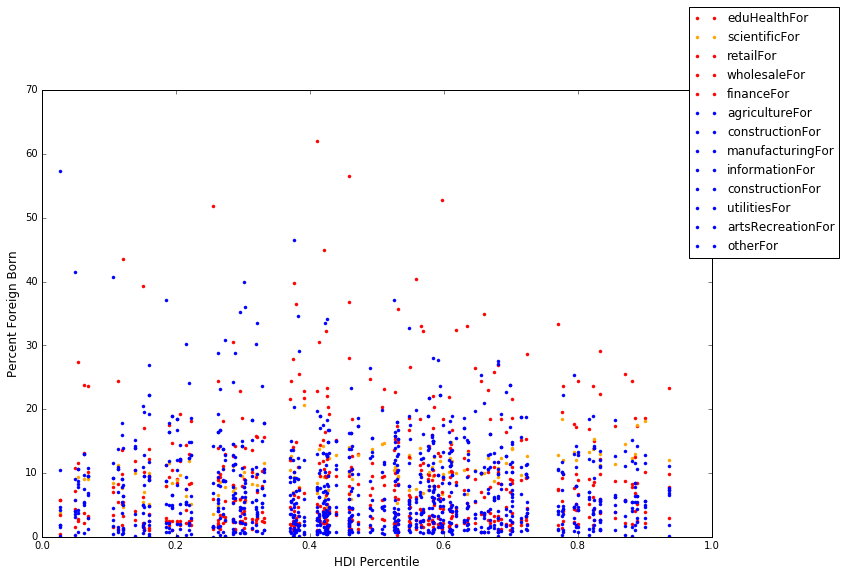

In [261]:
demographics.rename(columns={'Foreign born; Estimate; INDUSTRY - Agriculture, forestry, fishing and hunting, and mining':'agricultureFor',
                             'Foreign born; Estimate; INDUSTRY - Construction':'constructionFor',
                             'Foreign born; Estimate; INDUSTRY - Manufacturing':'manufacturingFor',
                             'Foreign born; Estimate; INDUSTRY - Wholesale trade':'wholesaleFor',
                             'Foreign born; Estimate; INDUSTRY - Retail trade':'retailFor',
                             'Foreign born; Estimate; INDUSTRY - Transportation and warehousing, and utilities':'utilitiesFor',
                             'Foreign born; Estimate; INDUSTRY - Information':'informationFor',
                             'Foreign born; Estimate; INDUSTRY - Finance and insurance, and real estate and rental and leasing':'financeFor',
                             'Foreign born; Estimate; INDUSTRY - Professional, scientific, and management, and administrative and waste management services':'scientificFor',
                             'Foreign born; Estimate; INDUSTRY - Educational services, and health care and social assistance':'eduHealthFor',
                             'Foreign born; Estimate; INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services':'artsRecreationFor',
                             'Foreign born; Estimate; INDUSTRY - Other services (except public administration)':'otherFor'}, inplace=True)

foreign_labor = demographics[['agricultureFor', 'constructionFor', 'manufacturingFor', 'wholesaleFor', 'retailFor', 'utilitiesFor', 'informationFor', 'financeFor', 'scientificFor', 'eduHealthFor', 'artsRecreationFor', 'otherFor']]
# foreign_labor['population'] = demographics['population']
# percentile rank
foreign_labor['HDI'] = full_table['HDI Percentile']
posSlopes = ['eduHealthFor', 'scientificFor', 'retailFor', 'wholesaleFor', 'financeFor']

plt.figure(figsize=(12, 8))
for labelName in posSlopes:
    if labelName == 'scientificFor':
        plt.plot(foreign_labor['HDI'], foreign_labor[labelName], '.', color='orange')
    else:
        plt.plot(foreign_labor['HDI'], foreign_labor[labelName], '.', color='red')
    
negSlopes = ['agricultureFor', 'constructionFor', 'manufacturingFor', 'informationFor', 'constructionFor', 'utilitiesFor', 'artsRecreationFor', 'otherFor']

for labelName in negSlopes:
    plt.plot(foreign_labor['HDI'], demographics[labelName], '.', label=labelName, color='blue')

    
plt.ylabel("Percent Foreign Born", fontsize=12)
plt.xlabel("HDI Percentile", fontsize=12)
plt.legend(bbox_to_anchor=(1.2, 1.2))

/Users/user/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Mean Net Income Per Resident
Under 10% Foreign-born Mean Earnings:  66491.39252336448
Above 10% Foreign-born Mean Earnings:  76949.0


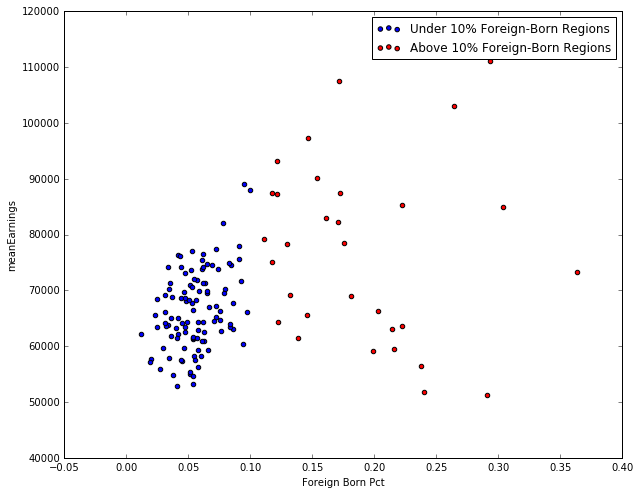

In [262]:
above_10_foreign = demographics[demographics['Foreign Born Pct'] > 0.10]
under_10_foreign = demographics[demographics['Foreign Born Pct'] < 0.10]

under_10_foreign.rename(columns={'Total; Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Households - With earnings - Mean earnings (dollars)':'meanEarnings'}, inplace=True)
above_10_foreign.rename(columns={'Total; Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Households - With earnings - Mean earnings (dollars)':'meanEarnings'}, inplace=True)

under_10_plot = under_10_foreign.plot(kind='scatter', y='meanEarnings', x='Foreign Born Pct', legend=True, label="Under 10% Foreign-Born Regions", figsize=(10, 8))
above_10_foreign.plot(ax=under_10_plot, kind='scatter', y='meanEarnings', x='Foreign Born Pct', legend=True, label="Above 10% Foreign-Born Regions", color='r')

print('Mean Net Income Per Resident')
print('Under 10% Foreign-born Mean Earnings: ', under_10_foreign['meanEarnings'].mean())
print('Above 10% Foreign-born Mean Earnings: ', above_10_foreign['meanEarnings'].mean())



In [263]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()
        
        
class DiversityEffects(HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = numpy.hstack((group1, group2))

    def RunModel(self):
        numpy.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

    
forData = under_10_foreign.meanEarnings, above_10_foreign.meanEarnings
ct = DiversityEffects(forData)
pvalue = ct.PValue()
print('Hypothesis Test')
print('P-Value:', pvalue)

Hypothesis Test
P-Value: 0.0


To recap, the hypothesis we intended to test was whether or not regions with larger foreign populations tended to have higher mean earnings. We found this to be true, as the test statistic in our sample had an impact of about $10,457.60. To prove that this is statistically significant, we ran random models where the regions were evenly distributed, and the percentage of foreign-born residents were arbitrary. We received a p-value of 0.002, which means that this statistic is statistically significant.

This data seems to show one possible answer to our question-- high-population regions tend to have a higher foreign born population, and foreign-born residents commonly work in industries that are more lucrative, and are in abundance of jobs.

I was then curious as to how the effects of having more foreign-born residents affects foreign-born behavior. For example, are foreigners more likely to be insured if they are surrounded by more foreigners? According to our graphs below, the answer is yes. We can see that regions with high foreign-populations tend to have more foreigners insured.????

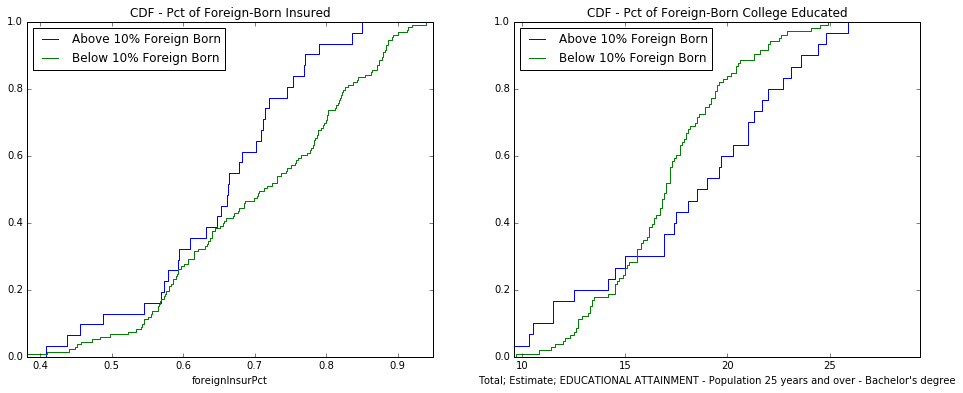

In [264]:
fig, axs = plt.subplots(1,2)

# Health Insurance
insurance['foreignPct'] = insurance['Total; Estimate; NATIVITY AND U.S. CITIZENSHIP STATUS - Foreign born'] / insurance['population']
insurance['foreignInsurPct'] = insurance['Insured; Estimate; NATIVITY AND U.S. CITIZENSHIP STATUS - Foreign born'] / insurance['Total; Estimate; NATIVITY AND U.S. CITIZENSHIP STATUS - Foreign born']
above10ForIns = insurance[insurance['foreignPct'] > .10]
below10ForIns = insurance[insurance['foreignPct'] < .10]

ser = above10ForIns['foreignInsurPct'].sort_values()
cum_dist = numpy.linspace(0.,1.,len(ser))
ser_cdf = pandas.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps', label="Above 10% Foreign Born", legend=True, ax=axs[0], figsize=(16,6))

ser = below10ForIns['foreignInsurPct'].sort_values()
cum_dist = numpy.linspace(0.,1.,len(ser))
ser_cdf = pandas.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps', label="Below 10% Foreign Born", legend=True, ax=axs[0], title="CDF - Pct of Foreign-Born Insured")

# Bachelor's Degree
above10ForDeg = above_10_foreign['Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor\'s degree']
under10ForDeg = under_10_foreign['Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor\'s degree']

ser = above10ForDeg.sort_values()
cum_dist = numpy.linspace(0.,1.,len(ser))
ser_cdf = pandas.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps', label="Above 10% Foreign Born", legend=True, ax=axs[1], figsize=(16,6))

ser = under10ForDeg.sort_values()
cum_dist = numpy.linspace(0.,1.,len(ser))
ser_cdf = pandas.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps', label="Below 10% Foreign Born", legend=True, ax=axs[1], title="CDF - Pct of Foreign-Born College Educated")


The two plots above show that as the foreign population grows in an area, foreign-born residents are increasingly less likely to be insured, but more likely to attain bachelor's degrees. One interpretation here could be that they feel more comfortable when surrounded by people with similar backgrounds and thus find it easier to succeed academically. However, there could be a distrust or misunderstanding about the U.S.'s healthcare system that is greater accentuated in large foreign-born communities.

We have discovered that there is a distinction between regions with above 10% foreign-born residents and below 10% foreign-born residents in terms of average earnings. We can now look at a different kind of diversity-- that of race. We can utilize a diversity index formula, sourced from http://www.unc.edu/~pmeyer/carstat/tools.html, that was used in many media sources to get a sense of racial diversity.

In [274]:
demographics.rename(columns={'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White':'white',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American':'black',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native':'native',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Asian':'asian',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander':'pacific',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Some other race':'otherRace',
    'Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Two or more races':'mixed'}, inplace=True)

race = demographics[['white','black','native','asian','pacific','otherRace','mixed']]

# probability of picking two people of diff race
race['diversity_index'] = 1 - (numpy.square(race['white']/100) + numpy.square(race['black']/100) + numpy.square(race['asian']/100) + numpy.square(race['native']/100) + numpy.square(race['pacific']/100) + numpy.square(demographics['mixed']/100) + numpy.square(demographics['otherRace']/100))
print(race['diversity_index'].sort_values())

Geography
Johnson City-Kingsport-Bristol, TN-VA CSA               0.102354
Portland-Lewiston-South Portland, ME CSA                0.119004
Wausau-Stevens Point-Wisconsin Rapids, WI CSA           0.124248
Charleston-Huntington-Ashland, WV-OH-KY CSA             0.126070
Bend-Redmond-Prineville, OR CSA                         0.130140
Springfield-Branson, MO CSA                             0.133841
Brownsville-Harlingen-Raymondville, TX CSA              0.146931
Medford-Grants Pass, OR CSA                             0.151739
Appleton-Oshkosh-Neenah, WI CSA                         0.153909
McAllen-Edinburg, TX CSA                                0.155653
Fargo-Wahpeton, ND-MN CSA                               0.166416
Idaho Falls-Rexburg-Blackfoot, ID CSA                   0.171232
Boise City-Mountain Home-Ontario, ID-OR CSA             0.173521
Knoxville-Morristown-Sevierville, TN CSA                0.174256
State College-DuBois, PA CSA                            0.174526
Asheville-Breva

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [275]:
diversity_hdi = pandas.DataFrame(data={'diversity_index':race['diversity_index'],'HDI':final['HDI Percentile'] * 100})
diversity_hdi.corr('spearman')

,HDI,diversity_index
HDI,1.000000,0.073879
diversity_index,0.073879,1.000000


Our data shows that racial diversity has very little to do with our composite well-being metric. Given our findings on the positive impact of a higher foreign-born population, this proves to be quite surprising, especially given that one would expect to find racial diversity among higher population densities. However, the diversity index has its faults, namely that it predicts the likelihood of picking two random people of different races, but does not take into account the balance of these races. Hence, Fayetteville-Lumberton showed up first in our ranking because there is an even distribution of Caucasian and African-Americans at roughly 40-45% each, but not as many Hispanics, Asians, Pacific Islanders, or others (including the mixed race population).

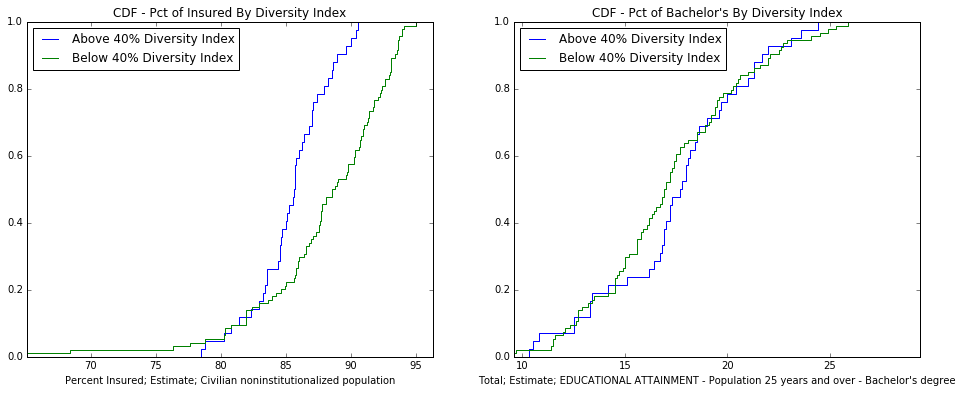

In [276]:
insurance['diversity_index'] = race['diversity_index']
demographics['diversity_index'] = race['diversity_index']
fig, axs = plt.subplots(1,2)

# Health Insurance
above40DivIns = insurance[insurance['diversity_index'] > .40]
below40DivIns = insurance[insurance['diversity_index'] < .40]

ser = above40DivIns['Percent Insured; Estimate; Civilian noninstitutionalized population'].sort_values()
cum_dist = numpy.linspace(0.,1.,len(ser))
ser_cdf = pandas.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps', label="Above 40% Diversity Index", legend=True, ax=axs[0], figsize=(16,6))

ser = below40DivIns['Percent Insured; Estimate; Civilian noninstitutionalized population'].sort_values()
cum_dist = numpy.linspace(0.,1.,len(ser))
ser_cdf = pandas.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps', label="Below 40% Diversity Index", legend=True, ax=axs[0], title="CDF - Pct of Insured By Diversity Index")

# Bachelor's Degree
above40DivEdu = demographics[demographics['diversity_index'] > .40]
below40DivEdu = demographics[demographics['diversity_index'] < .40]
above40Deg = above40DivEdu['Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor\'s degree']
below40Deg = below40DivEdu['Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Bachelor\'s degree']

ser = above40Deg.sort_values()
cum_dist = numpy.linspace(0.,1.,len(ser))
ser_cdf = pandas.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps', label="Above 40% Diversity Index", legend=True, ax=axs[1], figsize=(16,6))

ser = below40Deg.sort_values()
cum_dist = numpy.linspace(0.,1.,len(ser))
ser_cdf = pandas.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps', label="Below 40% Diversity Index", legend=True, ax=axs[1], title="CDF - Pct of Bachelor's By Diversity Index")
